# Table of Contents

# Setting Up the Notebook

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensure matplotlib visualize appear in notebook
%matplotlib inline

In [3]:
# Set up path and import dataset
path = r'C:\Users\mmreg\OneDrive\Desktop\Data Analytics Course Work\Data Immersion\Tasks\08-2022 Exploratory Analytics Project\02 Data'
df = pd.read_csv(os.path.join(path, 'Prepared', 'citibike_clean_time.csv'), index_col = False)

In [4]:
# Ensure proper import
df.head()

trip_id  bike_id weekday  start_hour start_time  start_station_id  \
0  LnQzQk    16013     Mon          18      18:18               523   
1  IL9boN    15230     Thu          18      18:38               257   
2  46clGB    17942     Wed          19      19:44               479   
3  v7vdFt    19683     Sat          11      11:54               527   
4  VGBsb5    18024     Sat          18      18:08               521   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4          8 Ave & W 31 St               40.750450               -73.994811   

  end_time  end_station_id     end_station_name  end_station_latitude  \
0    18:35             334      W 20 St & 7 Ave             40.742388   
1    18:48             236  St Marks Pl & 2 Ave             40.728419   
2    19:50             513     W 56 St & 10 Ave             40.768254   
3    12:03             441      E 52 St & 2 Ave             40.756014   
4    18:46             476      E 31 St & 3 Ave             40.743943   

   end_station_longitude  trip_duration      subscriber  birth_year  gender  \
0             -73.997262            993      Subscriber      1968.0       2   
1             -73.987140            581      Subscriber      1983.0       1   
2             -73.988639            361      Subscriber      1989.0       1   
3             -73.967416            561      Subscriber      1988.0       2   
4             -73.979661           2296  Non-Subscriber         NaN       0   

  customer_volume  
0     High Volume  
1     High Volume  
2     High Volume  
3   Normal Volume  
4     High Volume

# Question 3
## Clean your data so that it's ready for analysis.

In [5]:
# Check for missing values
df.isnull().sum()
# No missing values

trip_id                       0
bike_id                       0
weekday                       0
start_hour                    0
start_time                    0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_time                      0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
trip_duration                 0
subscriber                    0
birth_year                 6979
gender                        0
customer_volume               0
dtype: int64

In [6]:
# Check for duplicate records
dupes = df[df.duplicated()]

In [7]:
dupes
# No duplicates found

Empty DataFrame
Columns: [trip_id, bike_id, weekday, start_hour, start_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_time, end_station_id, end_station_name, end_station_latitude, end_station_longitude, trip_duration, subscriber, birth_year, gender, customer_volume]
Index: []

In [8]:
# I noticed outliers in the birth year column a couple of tasks ago. I will check on this now.
df['birth_year'].mean()

1975.6277864298831

In [9]:
df['birth_year'].median()

1978.0

In [10]:
df['birth_year'].mode()

0    1985.0
Name: birth_year, dtype: float64

In [11]:
df['birth_year'].min()

1899.0

In [12]:
df['birth_year'].max()

1997.0

In [13]:
# In the previous task, I asserted that 70 and younger was the demographic of the service. I wish to test to make sure this is correct.
df_test = df[df['birth_year'] < 1943]

In [14]:
df_test['birth_year'].value_counts(dropna = False)

1942.0    37
1940.0    20
1941.0    18
1935.0    14
1932.0    10
1900.0     9
1939.0     8
1899.0     8
1938.0     7
1937.0     7
1933.0     5
1901.0     5
1936.0     4
1922.0     3
1934.0     2
1910.0     1
1929.0     1
1917.0     1
1926.0     1
1924.0     1
1921.0     1
Name: birth_year, dtype: int64

In [15]:
# These records account for less than 0.003% of records with this error in birth year; I will remove them from the dataset to reduce skew
df = df[df['birth_year'] >= 1943]

In [16]:
# Confirm birth_year outliers have been neutralized by histogram
sns.histplot(df['birth_year'], bins = 25, kde = True)

<AxesSubplot:xlabel='birth_year', ylabel='Count'>

<AxesSubplot:xlabel='gender', ylabel='Count'>

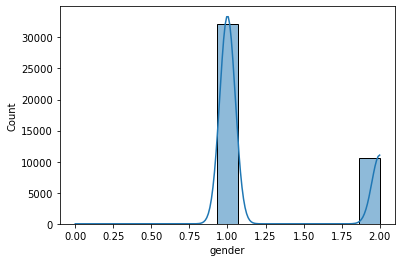

In [17]:
# Check gender column for outliers
sns.histplot(df['gender'], bins = 15, kde = True)

In [18]:
# It is known that the 0 for undecided exists in the data: lets check how many there are
df['gender'].value_counts(dropna = False)

1    32221
2    10635
0        2
Name: gender, dtype: int64

In [19]:
# Since there are only 2 unknown points, I will remove them fromt he dataset
df = df[df['gender'] >= 1]

In [20]:
# Ensure gender has been dropped
df['gender'].value_counts(dropna = False)

1    32221
2    10635
Name: gender, dtype: int64

### All data has been cleaned and ready for analysis

# Question 4
## Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

### The only correlation that had any sort of strength to it in 6.2 was the trip_duration and age. This will be looked at, among others

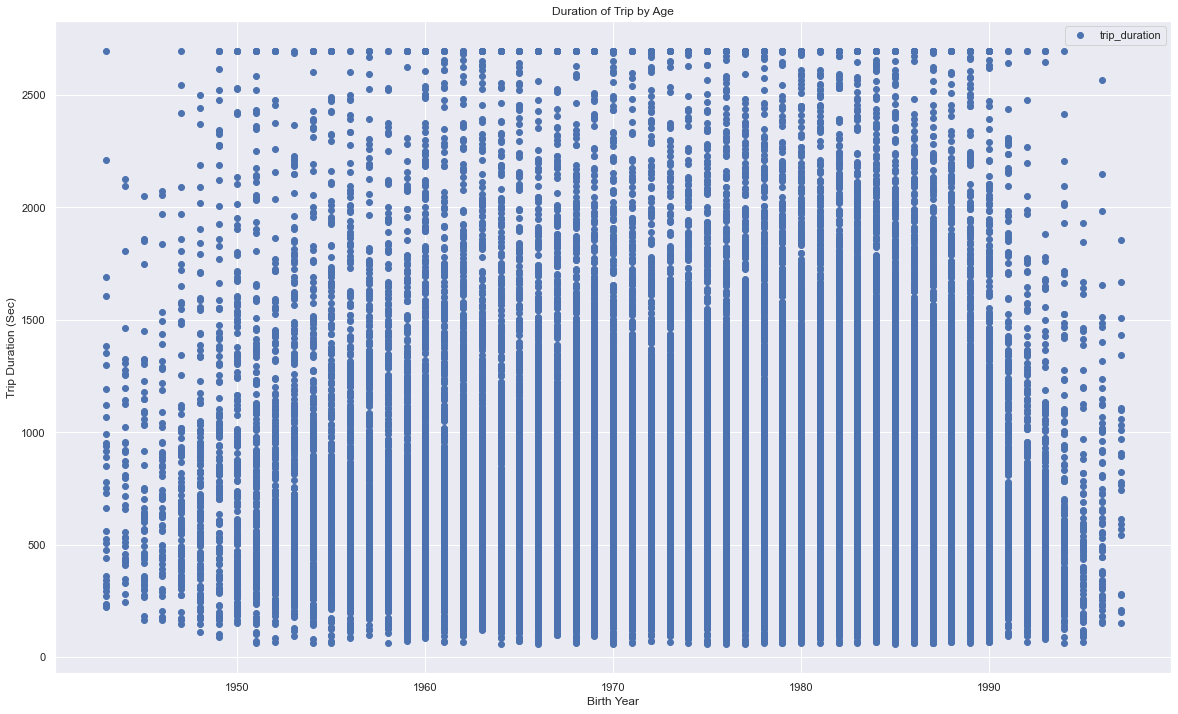

In [21]:
# Create scatterplot with trip_duration and age
sns.set(rc = {'figure.figsize':(20,12)})
df.plot(x = 'birth_year', y='trip_duration',style='o')
plt.title('Duration of Trip by Age')  
plt.xlabel('Birth Year')  
plt.ylabel('Trip Duration (Sec)')  
plt.show()

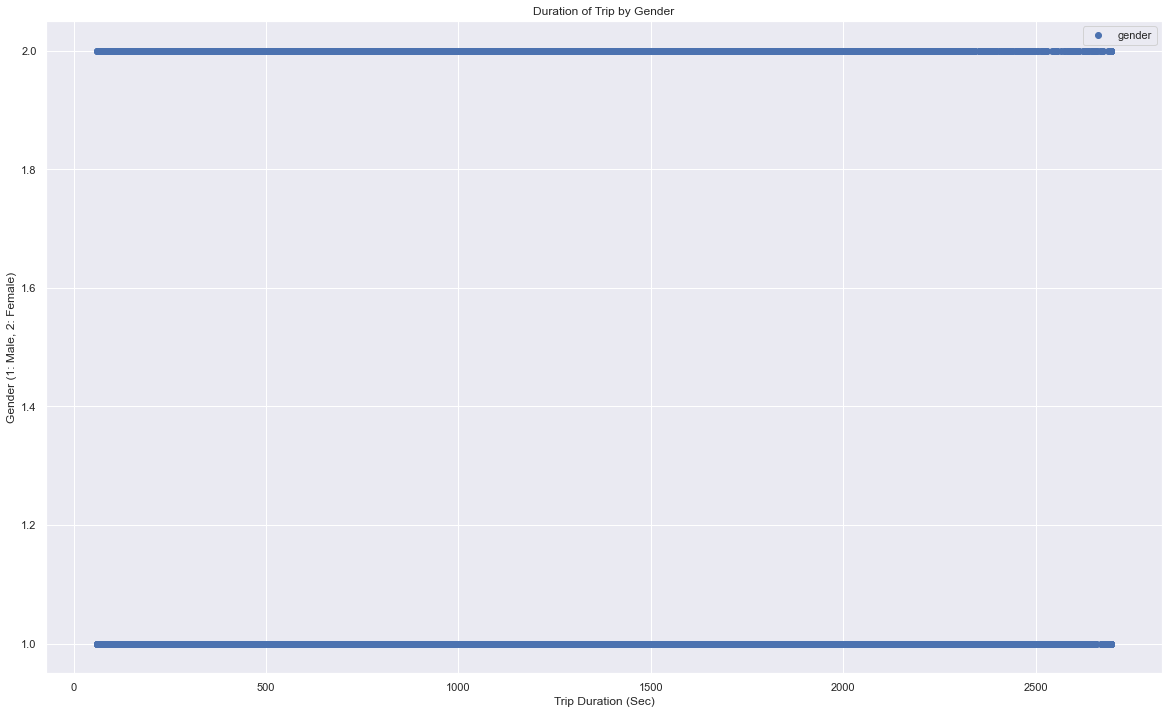

In [22]:
# Create scatterplot with trip_duration and gender
sns.set(rc = {'figure.figsize':(20,12)})
df.plot(x = 'trip_duration', y='gender',style='o')
plt.title('Duration of Trip by Gender')  
plt.xlabel('Trip Duration (Sec)')  
plt.ylabel('Gender (1: Male, 2: Female)')  
plt.show()

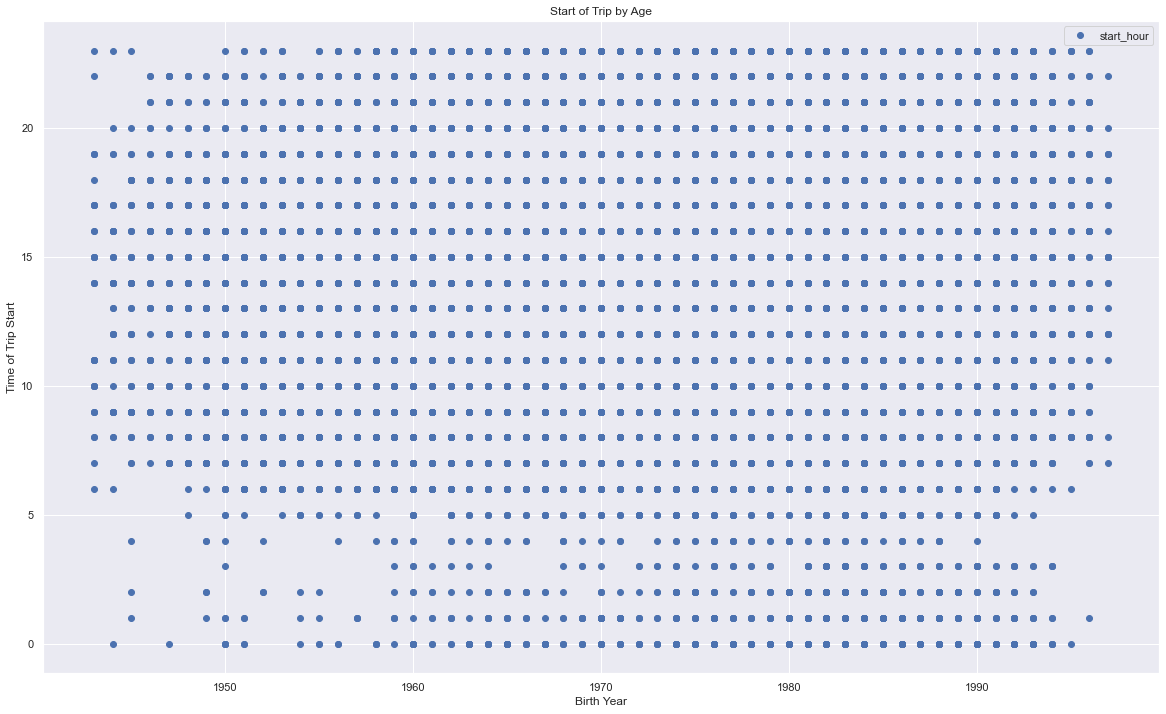

In [24]:
# Create scatterplot of start_time and birth_year
sns.set(rc = {'figure.figsize':(20,12)})
df.plot(x = 'birth_year', y='start_hour',style='o')
plt.title('Start of Trip by Age')  
plt.xlabel('Birth Year')  
plt.ylabel('Time of Trip Start')  
plt.show()

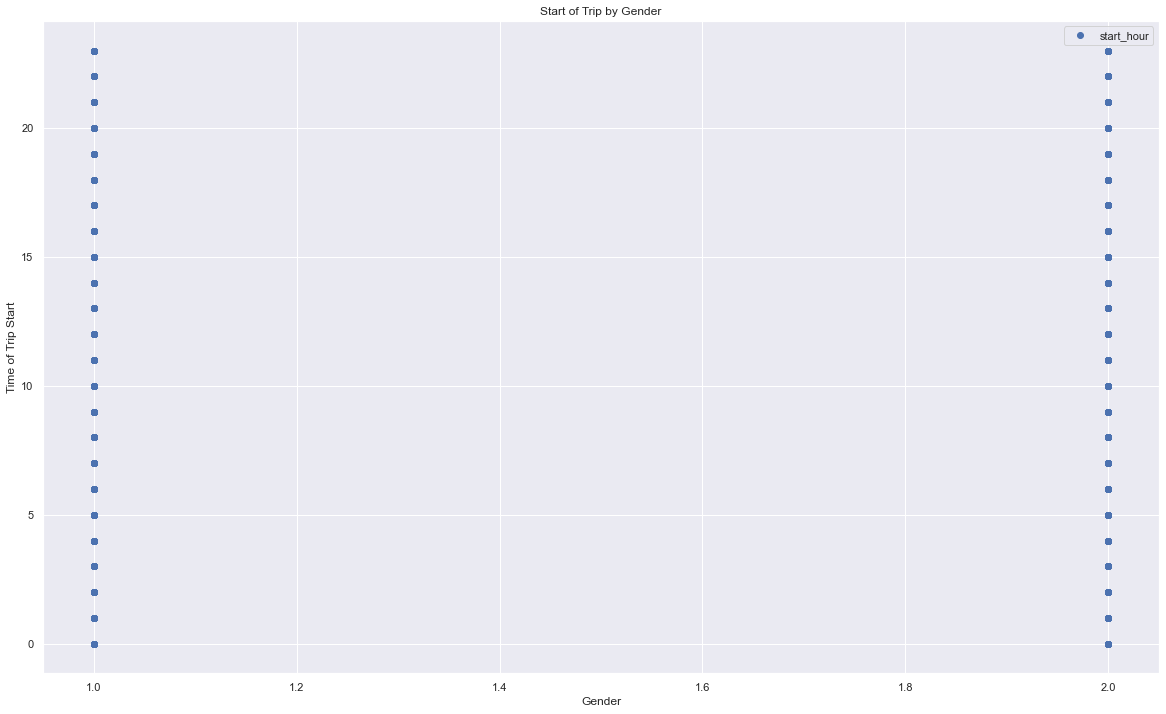

In [25]:
# Create scatterplot of start_time and gender
sns.set(rc = {'figure.figsize':(20,12)})
df.plot(x = 'gender', y='start_hour',style='o')
plt.title('Start of Trip by Gender')  
plt.xlabel('Gender')  
plt.ylabel('Time of Trip Start')  
plt.show()

# Question 5
## State your hypothesis in a markdown cell within your Jupyter notebook.

### There aren't many high correlation variables within the dataset; however, the one that looks most promising is the relationship between trip duration and birth year. Based on the scatterplot, I propose the following hypothesis:
### - The younger the customer (or the higher the birth year), the longer the duration of the trip.

# Question 6
## Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

### As a reference, the independent variable (X) will be the column 'birth_year', and the dependent variable (y) will be the column 'trip_duration'.

In [27]:
# Create variables for numpy array with chosen (in)dependent variables
X = df['birth_year'].values.reshape(-1,1)
y = df['trip_duration'].values.reshape(-1,1)

In [28]:
# Confirm proper creation of objects
X

array([[1968.],
       [1983.],
       [1989.],
       ...,
       [1970.],
       [1961.],
       [1980.]])

In [29]:
y

array([[ 993],
       [ 581],
       [ 361],
       ...,
       [1191],
       [1050],
       [ 370]], dtype=int64)

# Question 7
## Split the data into two sets: a training set and a test set.

In [30]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Question 8
## Run a linear regression on the data.
### a. First, fit the model you created to the training set.

In [31]:
# Create regression object
regression = LinearRegression()

In [32]:
# Fit the regression object to the training data
regression.fit(X_train, y_train)

LinearRegression()

### b. Then, create a prediction for y on the test set.

In [33]:
# Predict y values using X
y_predicted = regression.predict(X_test)

# Question 9
## Create a plot that shows the regression line on the test set.

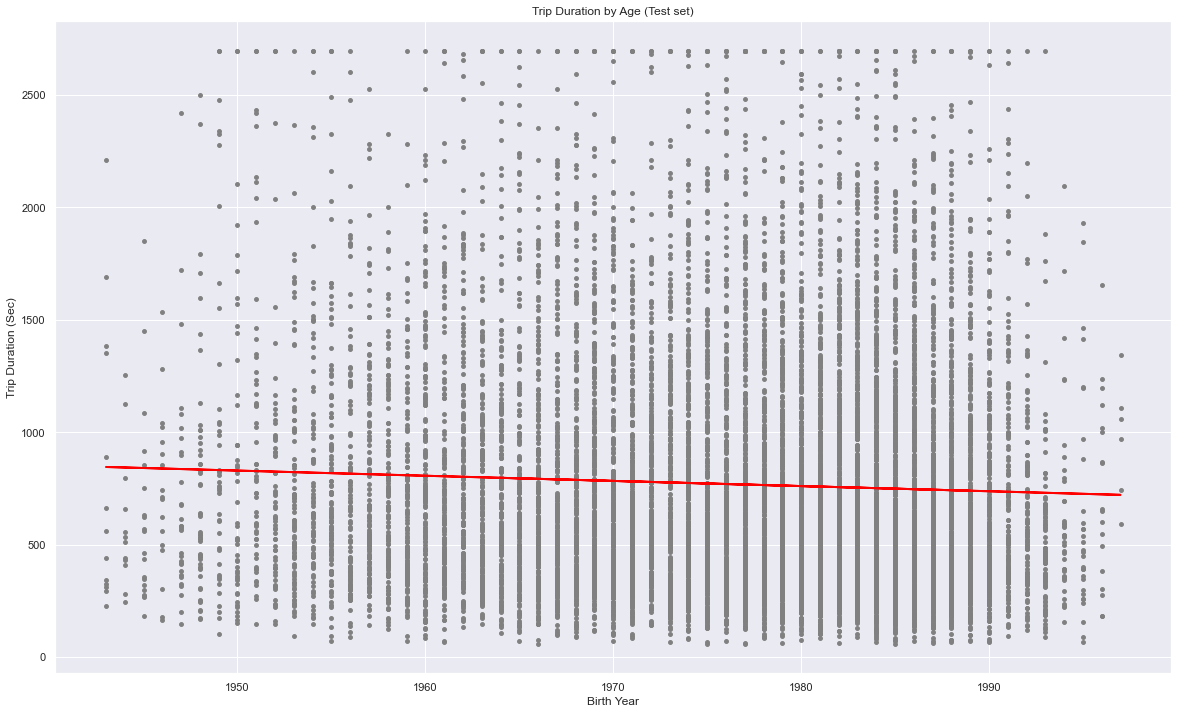

In [34]:
# Plot predicted y-values
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =2)
plot_test.title('Trip Duration by Age (Test set)')
plot_test.xlabel('Birth Year')
plot_test.ylabel('Trip Duration (Sec)')
plot_test.show()

# Question 10
## Write your own interpretation of how well the line appears to fit the data in a markdown cell.
### Looking at the line, I can immediately tell that there will not be a good fit with this regression. The vast majority of points are far away from the regression line, and it seems to be a hard task to try and estimate this.

# Question 11
## Check the model performance statistics—MSE and R2.

In [35]:
# Create the objects for the model summary stats
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [36]:
# View the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-2.29611853]]
Mean squared error:  268864.6760180851
R2 score:  0.0015781431974480897


# Question 12
## Compare the predicted y values with the actual y values in a dataframe.

In [37]:
# View predicted and actual y values in dataframe
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual   Predicted
0     1116  740.018641
1      300  751.499233
2      401  792.829367
3      455  802.013841
4     1277  746.906996
5      556  753.795352
6      216  788.237130
7     1384  785.941011
8      523  781.348774
9      190  820.382789
10    1394  792.829367
11     725  783.644893
12     722  788.237130
13     316  765.275945
14     415  788.237130
15     284  779.052656
16     496  723.945811
17     401  746.906996
18     375  788.237130
19     315  737.722522
20     136  735.426404
21    2118  762.979826
22    1822  767.572063
23    1431  765.275945
24    1013  760.683707
25     972  730.834167
26     872  744.610878
27     953  779.052656
28    2211  790.533248
29    1565  751.499233

# Question 13
## Include your thoughts on how well the model performed on the test set in a markdown cell.

### Overall, the model performed quite horribly. The y-values that were predicted are very linear, while the plotted data suggests that the data is much more variable. With the removal of the birth years that are too few and far in between we removed most bias; however the linear regression model just does not work with this correlation.

In [38]:
# Save dataset for future analysis
df.to_csv(os.path.join(path, 'Prepared', 'citibike_clean.csv'))